In [4]:
import requests
import pandas as pd
import io

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=EUR&apikey=demo&datatype=csv'
r = requests.get(url)

# Check if the request was successful
if r.status_code == 200:
    # Directly convert the CSV content to a pandas DataFrame
    data = pd.read_csv(io.StringIO(r.text))
    
    # Example: Display the first few rows of the DataFrame
    print(data.head())
else:
    print("Failed to retrieve data. Status code:", r.status_code)

    timestamp      open      high       low     close       volume
0  2024-08-09  56585.82  56593.13  56242.54  56497.73     5.500799
1  2024-08-08  50512.15  57499.00  50129.82  56563.20   461.426922
2  2024-08-07  51369.66  52950.00  50010.13  50495.77   549.410474
3  2024-08-06  49417.12  52299.98  49371.86  51374.96   963.933432
4  2024-08-05  53330.01  53448.81  45021.36  49408.05  3196.637071


In [5]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query'

parameters = {
  'function':'NEWS_SENTIMENT',
  'ticker':'BTC',
  'apikey':'demo'
}
r = requests.get(url, params = parameters)
data = r.json()

print(data)

{'Information': 'The **demo** API key is for demo purposes only. Please claim your free API key at (https://www.alphavantage.co/support/#api-key) to explore our full API offerings. It takes fewer than 20 seconds.'}


In [6]:
import requests
import pprint
from io import StringIO

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=demo'
r = requests.get(url)
data = r.json()

# pprint.pp(data)
# Capture the output of pprint into a string
# output = StringIO()
# pprint.pp(data, stream=output)
# output_str = output.getvalue()

# # Limit the output to a certain number of characters
# char_limit = 500  # Set your desired character limit here
# limited_output = output_str[:char_limit]

# print(limited_output)

In [7]:
type(data)

dict

In [8]:
data.keys()

dict_keys(['items', 'sentiment_score_definition', 'relevance_score_definition', 'feed'])

In [9]:
num = 0
for i in data['feed']:
    if num == 0:
        pprint.pp(i)
        num += 1

{'title': 'Meta CEO Mark Zuckerberg Owns Two Of The Biggest Social Media '
          'Platforms In The World. He Now Thinks This Experience On Phones Is '
          "'Anti-Social,' And Why He's Focused On Ray-Ban Smart Glasses - "
          'Apple  ( NASDAQ:AAPL ) , Essilorluxottica  ( OTC:ESLOY ) ',
 'url': 'https://www.benzinga.com/markets/equities/24/08/40275791/meta-ceo-mark-zuckerberg-owns-two-of-the-biggest-social-media-platforms-in-the-world-he-now-thin',
 'time_published': '20240809T054029',
 'authors': ['Benzinga Neuro'],
 'summary': 'Mark Zuckerberg, the CEO of Meta Platforms Inc. META, '
            'acknowledged that the current social media experience on '
            'smartphones is "anti-social." This revelation is part of the '
            'reason why he is focusing on the development of Ray-Ban smart '
            'glasses.',
 'banner_image': 'https://cdn.benzinga.com/files/images/story/2024/08/09/Mark-Zuckerberg-Meta-Ray-Ban-glasses.jpeg?width=1200&height=800&fit=crop

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


340
10
range(340, 350)


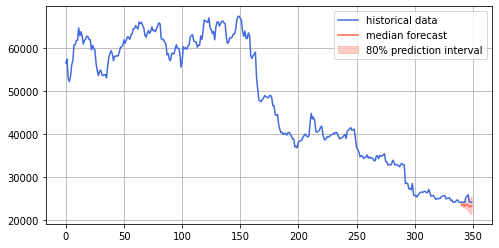

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-base",
  device_map="auto",
  torch_dtype=torch.bfloat16,
)

df = pd.read_csv("currency_daily_BTC_EUR (2).csv")

prediction_length = 10
header = "high"
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
bonudary = len(df)-prediction_length
context = torch.tensor(df[header][:bonudary]) 
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# # visualize the forecast
# forecast_index = range(len(df)-const, len(df)-const + prediction_length)
forecast_index = range(len(df)-prediction_length, len(df))

low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

print(len(df[header][:bonudary]))
print(len(median))
print(forecast_index)
plt.figure(figsize=(8, 4))
plt.plot(df[header], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()


In [11]:
len(df[header][:bonudary])

340

In [12]:
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)
len(low)

10

In [13]:
len(df[header][:bonudary]) + len(low)

350

In [14]:
df[header][bonudary:]

340    24182.27
341    24238.03
342    24117.82
343    24110.45
344    25363.76
345    25529.56
346    25955.15
347    24261.01
348    24253.67
349    24192.94
Name: high, dtype: float64

In [15]:
row = 340
for i in low:
    
    print(f"{row}: {i}")
    row +=1

340: 23252.102094101007
341: 23252.102094101007
342: 22899.263116903763
343: 22934.547143710864
344: 22934.547143710864
345: 22581.706875639837
346: 22228.86804187301
347: 21876.02920810619
348: 21487.90649096268
349: 21840.745324729505


In [16]:
const = prediction_length
row = len(df) - const
for i in median:
    print(f"{row} {i:.2f}")
    row += 1

340 23640.22
341 23640.22
342 23640.22
343 23287.39
344 23640.22
345 23640.22
346 23463.81
347 23110.97
348 23287.39
349 23287.39


In [17]:
df[header][349 - const:]

339    24153.16
340    24182.27
341    24238.03
342    24117.82
343    24110.45
344    25363.76
345    25529.56
346    25955.15
347    24261.01
348    24253.67
349    24192.94
Name: high, dtype: float64

In [18]:
test = df[header][349 - const:]
err_ls = []
for num in range(len(test)):
    error_rate = (test.iloc[num] - median[num - 1]) / median[0] * 100
    err_ls.append(error_rate)
    print(error_rate)

3.662291832819215
2.2928935451479284
2.5287627064829596
2.020265004114152
3.4816251922055272
7.290688656800251
7.992035625045409
10.538582545348248
4.864773700708206
4.087456994328977
3.830564344259451


In [19]:
err_ls.pop(len(err_ls)-4)
for elem in err_ls:
    nums = 0 
    nums += elem
nums / len(err_ls) * 100 

import statistics
statistics.variance(err_ls)

4.056580634529754

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


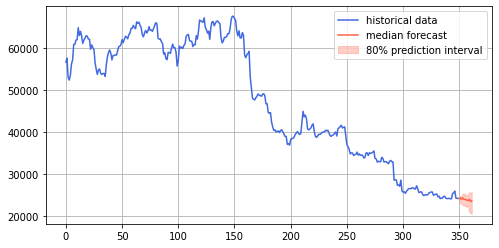

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-base",
  device_map="auto",
  torch_dtype=torch.bfloat16,
)

df = pd.read_csv("currency_daily_BTC_EUR (2).csv")

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["high"])
prediction_length = 12
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["high"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()


In [21]:
def guard(type):
    if type not in MODEL_TYPES.keys():
        raise ValueError(f"Invalid input: '{type}'. Must be one of {MODEL_TYPES.keys()}")
    return True

In [22]:
lsp = [1,2,3]
lsp[0] - lsp[-1]

-2

In [23]:
######### import the necessary libraries
########################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline


# create the pipline
# pipeline = ChronosPipeline.from_pretrained(
#   "amazon/chronos-t5-base",
#   device_map="auto",
#   torch_dtype=torch.bfloat16,
# )


class ChronosModel:
    """ 
    a form of intializing chronos models that is very easy to initialize
    
    
    
    
    """
    
    # class constants 
    
    MODEL_TYPES = {"tiny": "amazon/chronos-t5-tiny", 
                   "mini": "amazon/chronos-t5-mini", 
                   "small" : "amazon/chronos-t5-small", 
                   "base" : "amazon/chronos-t5-base", 
                   "large": "amazon/chronos-t5-large"}
    
    
    
    #############################################
    def __init__(self, model: str, df, column, prediction_length: int, reserve: bool):
        
        if model not in self.MODEL_TYPES.keys():
            raise ValueError(f"Invalid input: '{type}'. Must be one of {MODEL_TYPES.keys()}")
        
        self.model_type = self.MODEL_TYPES[model]
        self.df = df
        self.prediction_length = prediction_length
        self.pipeline = ChronosPipeline.from_pretrained(
            self.model_type,
            device_map="auto",
            torch_dtype=torch.bfloat16,
            )
         
        print(self.model_type)
        if column not in df.columns:
            raise ValueError(f"{column} is not a column in the passed dataframe")
        
        self.column = column
        self.reserve = reserve
        
        
    #############################################
    def forecast(self):
        if self.reserve == True:
            boundary = len(df) - self.prediction_length
            print(len(df[self.column][:bonudary]))
            context = torch.tensor(df[self.column][:boundary])          
        else:
            context = torch.tensor(df[self.column])
            print(len(df[self.column]))
        
        forecast = pipeline.predict(context, prediction_length)
        
        
    
    #############################################
        
    def visualize(self, quantile_list = [0.1, 0.5, 0.9]):
        forecast_index = range(len(df)-prediction_length, len(df))

        low, median, high = np.quantile(forecast[0].numpy(), quantile_list, axis=0)
        print(len(median))
        print(forecast_index)
        plt.figure(figsize=(8, 4))
        plt.plot(df[self.column], color="royalblue", label="historical data")
        plt.plot(forecast_index, median, color="tomato", label="median forecast")
        plt.fill_between(forecast_index, low, high, 
                         color="tomato", 
                         alpha=0.3, 
                         label= f"{(quantile_list[-1] - quantile_list[0])* 100}% prediction interval")
        plt.legend()
        plt.grid()
        plt.show()


print(len(df[header][:bonudary]))
print(len(median))
print(forecast_index)

340
12
range(350, 362)


In [24]:
df = pd.read_csv("currency_daily_BTC_EUR (2).csv")

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["high"])
prediction_length = 12

In [25]:
a1 = ChronosModel("small", df, "high", 4, True)
a1.forecast()

NameError: name 'MODEL_TYPES' is not defined

In [ ]:
a1.visualize()

In [ ]:
df.shape

In [ ]:
isinstance(df["high"], pd.Series)

In [ ]:
df